In [1]:
#import packages
import numpy as np #for array and matrices
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt #for clearing plots
from sklearn.model_selection  import train_test_split #for split the data into training and test
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score #for confusion matrix
import warnings
warnings.filterwarnings("ignore") #to ignore all the warnings

In [2]:
#load the dataset
#read_csv is from pandas and it is use for loading the data
m_health_all = pd.read_csv('D:\\Semester 3\\healthcare Analytics\\project\\survey.csv')

In [3]:
# see the information of data
m_health_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [4]:
# create comments dataframe where remove all the null values from comments column
comments = m_health_all[pd.notnull(m_health_all['comments'])]

In [5]:
# select treatment and comments column in comments dataframe
comments = comments[['treatment', 'comments']]

In [6]:
# create series called comment_Yes where all the comments save where it is 'Yes' in column
comments_Yes = pd.Series(comments[comments['treatment'] == 'Yes']['comments'].tolist()).astype(str)

In [7]:
# see the series
comments_Yes

0      I have chronic low-level neurological issues t...
1      My company does provide healthcare but not to ...
2                    Relatively new job. Ask again later
3      Sometimes I think  about using drugs for my me...
4      I selected my current employer based on its po...
                             ...                        
101    The data will be skewed for self-employed peop...
102    I work at a large university with a track reco...
103    i'm in a country with social health care so my...
104    In australia all organisations of a certain si...
105                                    Bipolar disorder 
Length: 106, dtype: object

In [8]:
# join all the words
comments_Yes = " ".join(comments_Yes.astype(str))

- please install `wordcloud` library if you already have move on
- to install `wordcloud` you use directly this command in jupyter `!pip install wordcloud`
- otherwise you can install in Anaconda Prompt or Anaconda Navigator

In [9]:
#for creating word cloud
from wordcloud import WordCloud

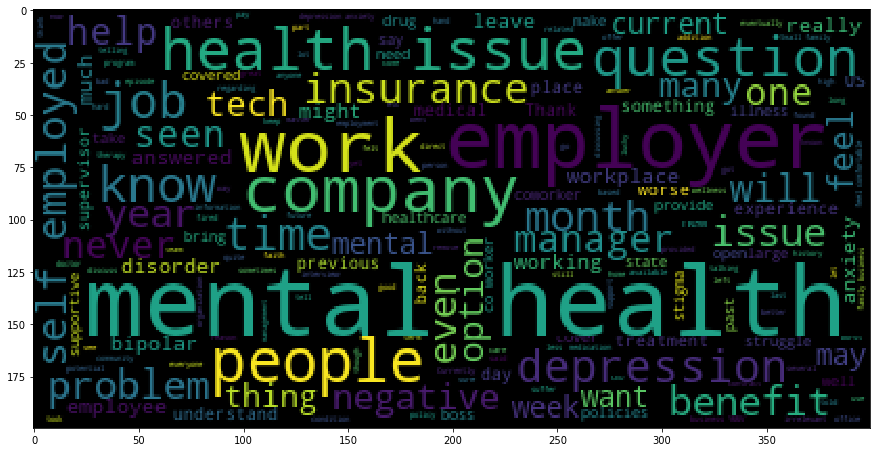

In [10]:
#patients who has mental illness
comment_cloud = WordCloud().generate(comments_Yes)
plt.figure(figsize=(15,10))
plt.imshow(comment_cloud)

In [11]:
# remove the values if necessary and replace the values
comments['treatment'] = comments['treatment'].replace('Yes', "1")
comments['treatment'] = comments['treatment'].replace('No', "0")
comments = comments[comments.treatment != 'Maybe']

In [12]:
# store information in Dataframe
comments = pd.DataFrame(comments)

In [13]:
# set treatment as index column
comments.set_index(['treatment'], inplace=True)

In [14]:
comments

,comments
treatment,
0,I'm not on my company's health insurance which...
1,I have chronic low-level neurological issues t...
1,My company does provide healthcare but not to ...
1,Relatively new job. Ask again later
1,Sometimes I think about using drugs for my me...
...,...
0,Although my employer does everything they can ...
1,I work at a large university with a track reco...
1,i'm in a country with social health care so my...


# Natural Language Processing

In [15]:
# Clean the text by removing any extra characters 
import re # tools for cleaning text
import nltk # library to perform NLP
nltk.download('stopwords') #download stopwords if you don't have
from nltk.corpus import stopwords #stopwords use for remove extra characters
# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Keval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Steps for cleaning the first review and apply for loop on all the reviews
comments['comments'][2]
Comments = re.sub('[^a-zA-Z]', ' ', comments['comments'][2]) # only keep the letters so what we dont want to remove
Comments = Comments.lower() # make all letters as lowercase 
Comments = Comments.split()  # split the review into separate words to create a list of words
ps =PorterStemmer()
Comments = [ps.stem(word) for word in Comments if not  word in set(stopwords.words('english'))] # use set for larger text
Comments = ' '.join(Comments) # take the list of words back into the string

In [17]:
corpus = [] # Build a new list for all the words from all the comments
# corpus is a collection of text and a common term used in NLP
for i in range (0, 164):
    Comments = re.sub('[^a-zA-Z]', ' ', comments['comments'][i] )
    Comments = Comments.lower()
    Comments = Comments.split()
    ps =PorterStemmer()
    Comments = [ps.stem(word) for word in Comments if not  word in set(stopwords.words('english'))]
    Comments = ' '.join(Comments)
    corpus.append(Comments)

In [18]:
# Create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)# We restrict the words to 1500 which keeps the most frequent words
X = cv.fit_transform(corpus).toarray() # independent variables
y = comments.index #target variable

In [19]:
print('shape of features: ',X.shape)
print('shape of target: ',y.shape)

shape of features:  (164, 1069)
shape of target:  (164,)


# Machine Learning approches

In [20]:
# Split the data with train_test_split which by default split 75% as training and 25% as test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 14)

## K-nearest Neighbors

In [21]:
#KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#print the accuracy score
print('training accuracy is ',knn.score(X_train, y_train))
print('test accuracy is ',knn.score(X_test, y_test))

training accuracy is  0.7642276422764228
test accuracy is  0.6341463414634146


In [22]:
# Predicting the Test set results
y_pred = knn.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Making the Confusion Matrix
print('accuracy_score:',accuracy_score(y_test, y_pred))
print('recall_score:',recall_score(y_test, y_pred, average="weighted", pos_label="pos")) # tp / (tp + fn)
print('precision_score:',precision_score(y_test, y_pred, average="weighted", pos_label="pos")) # tp / (tp + fp)
print('f1_score:',f1_score(y_test, y_pred, average="weighted", pos_label="pos"))

df_cm = pd.DataFrame(cm, index = ('Actual: No','Actual: Yes'), columns = ('Predicted: No', 'Predicted: Yes'))
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))
df_cm

accuracy_score: 0.6341463414634146
recall_score: 0.6341463414634146
precision_score: 0.6445192038127278
f1_score: 0.638999227133023
Test Data Accuracy: 0.6341


,Predicted: No,Predicted: Yes
Actual: No,4,7
Actual: Yes,8,22


## Decision Tree Classifier

In [23]:
# Find Best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

from sklearn.tree import DecisionTreeClassifier 
for d in [2,3,4,5,6,7,8,9,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeClassifier(max_depth=d, min_samples_split=6)
    decision_tree.fit(X_train, y_train)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(X_train, y_train))
    print(decision_tree.score(X_test, y_test), '\n')  # You want the test score to be positive
    
# R-square for train and test scores are below. 
# Always remember that best accuracy that doesn't mean our model is perfect always check for confusion matrix.

max_depth= 2
0.6829268292682927
0.6829268292682927 

max_depth= 3
0.6991869918699187
0.7317073170731707 

max_depth= 4
0.7154471544715447
0.6829268292682927 

max_depth= 5
0.7317073170731707
0.6829268292682927 

max_depth= 6
0.7479674796747967
0.5853658536585366 

max_depth= 7
0.7642276422764228
0.6341463414634146 

max_depth= 8
0.7804878048780488
0.6829268292682927 

max_depth= 9
0.7967479674796748
0.6829268292682927 

max_depth= 10
0.8130081300813008
0.6585365853658537 



In [24]:
# DecisionTreeClassifier from sklearn.tree
tree = DecisionTreeClassifier(random_state=0, max_depth = 8, min_samples_split = 6)
tree.fit(X_train, y_train) 

#print the accuracy score
print('training accuracy is ',tree.score(X_train, y_train))
print('test accuracy is ',tree.score(X_test, y_test))

training accuracy is  0.7804878048780488
test accuracy is  0.7073170731707317


In [25]:
# Predicting the Test set results
y_pred = tree.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Making the Confusion Matrix
print('accuracy_score:',accuracy_score(y_test, y_pred))
print('recall_score:',recall_score(y_test, y_pred, average="weighted", pos_label="pos")) # tp / (tp + fn)
print('precision_score:',precision_score(y_test, y_pred, average="weighted", pos_label="pos")) # tp / (tp + fp)
print('f1_score:',f1_score(y_test, y_pred, average="weighted", pos_label="pos"))

df_cm = pd.DataFrame(cm, index = ('Actual: No','Actual: Yes'), columns = ('Predicted: No', 'Predicted: Yes'))
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))
df_cm

accuracy_score: 0.7073170731707317
recall_score: 0.7073170731707317
precision_score: 0.6745234679237548
f1_score: 0.6839430894308942
Test Data Accuracy: 0.7073


,Predicted: No,Predicted: Yes
Actual: No,3,8
Actual: Yes,4,26


## Random Forest Classifier

In [26]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create the random forest model and fit to the training data
cfr = RandomForestClassifier()
cfr.fit(X_train, y_train)

# Use ParameterGrid Search
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, but also takes longer it will take to compute. 
# Run grid search
grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [0]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    cfr.set_params(**g)  # ** is "unpacking" the dictionary
    cfr.fit(X_train, y_train)
    test_scores.append(cfr.score(X_test, y_test))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print('The best test score is:',test_scores[best_idx], ParameterGrid(grid)[best_idx])  

The best test score is: 0.7317073170731707 {'random_state': 0, 'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 2}


In [27]:
#RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_split = 2, random_state=0)
clf.fit(X_train, y_train)

#print the accuracy score
print('training accuracy is ',clf.score(X_train, y_train))
print('test accuracy is ',clf.score(X_test, y_test))

training accuracy is  0.6178861788617886
test accuracy is  0.7317073170731707


In [190]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Making the Confusion Matrix
print('accuracy_score:',accuracy_score(y_test, y_pred))
print('recall_score:',recall_score(y_test, y_pred, average="weighted", pos_label="pos")) # tp / (tp + fn)
print('precision_score:',precision_score(y_test, y_pred, average="weighted", pos_label="pos")) # tp / (tp + fp)
print('f1_score:',f1_score(y_test, y_pred, average="weighted", pos_label="pos"))

df_cm = pd.DataFrame(cm, index = ('Actual: No','Actual: Yes'), columns = ('Predicted: No', 'Predicted: Yes'))
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))
df_cm

accuracy_score: 0.7317073170731707
recall_score: 0.7317073170731707
precision_score: 0.5353955978584176
f1_score: 0.6183442116111302
Test Data Accuracy: 0.7317


,Predicted: No,Predicted: Yes
Actual: No,0,11
Actual: Yes,0,30


## Support Vector Machine

In [191]:
# Support vector classification form sklearn.svm
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

#print the accuracy score
print('training accuracy is ',svm.score(X_train, y_train))
print('test accuracy is ',svm.score(X_test, y_test))

training accuracy is  0.983739837398374
test accuracy is  0.6829268292682927


In [192]:
# Predicting the Test set results
y_pred = svm.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Making the Confusion Matrix
print('accuracy_score:',accuracy_score(y_test, y_pred))
print('recall_score:',recall_score(y_test, y_pred, average="weighted", pos_label="pos")) # tp / (tp + fn)
print('precision_score:',precision_score(y_test, y_pred, average="weighted", pos_label="pos")) # tp / (tp + fp)
print('f1_score:',f1_score(y_test, y_pred, average="weighted", pos_label="pos"))

df_cm = pd.DataFrame(cm, index = ('Actual: No','Actual: Yes'), columns = ('Predicted: No', 'Predicted: Yes'))
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))
df_cm

accuracy_score: 0.6829268292682927
recall_score: 0.6829268292682927
precision_score: 0.6738001573564123
f1_score: 0.6779764284762285
Test Data Accuracy: 0.6829


,Predicted: No,Predicted: Yes
Actual: No,4,7
Actual: Yes,6,24


## Naive Bayes Algorithm

In [193]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

#print the accuracy score
print('training accuracy is ',gnb.score(X_train, y_train))
print('test accuracy is ',gnb.score(X_test, y_test))

training accuracy is  0.975609756097561
test accuracy is  0.5121951219512195


In [194]:
# Predicting the Test set results
y_pred = gnb.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Making the Confusion Matrix
print('accuracy_score:',accuracy_score(y_test, y_pred))
print('recall_score:',recall_score(y_test, y_pred, average="weighted", pos_label="pos")) # tp / (tp + fn)
print('precision_score:',precision_score(y_test, y_pred, average="weighted", pos_label="pos")) # tp / (tp + fp)
print('f1_score:',f1_score(y_test, y_pred, average="weighted", pos_label="pos"))

df_cm = pd.DataFrame(cm, index = ('Actual: No','Actual: Yes'), columns = ('Predicted: No', 'Predicted: Yes'))
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))
df_cm

accuracy_score: 0.5121951219512195
recall_score: 0.5121951219512195
precision_score: 0.4801829268292683
f1_score: 0.49567269866247043
Test Data Accuracy: 0.5122


,Predicted: No,Predicted: Yes
Actual: No,0,11
Actual: Yes,9,21
